# Importe de Librerías

In [35]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carga de Datos

In [3]:
df_data= pd.read_csv("breast-cancer-wisconsin.data")
df_data

,ID_Number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Observación y Preprocesamiento

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID_Number                    699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
duplicates = df_data.duplicated("ID_Number", keep=False)
print('duplicados',df_data[duplicates])
df_data=df_data.drop_duplicates(subset=["ID_Number"])
df_data

duplicados      ID_Number  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
4      1017023                4                     1                      1   
8      1033078                2                     1                      1   
9      1033078                4                     2                      1   
29     1070935                1                     1                      3   
30     1070935                3                     1                      1   
..         ...              ...                   ...                    ...   
689     654546                1                     1                      1   
690     654546                1                     1                      1   
691     695091                5                    10                     10   
697     897471                4                     8                      6   
698     897471                4                     8                      8   

     Marginal_Adhesion  Sing

,ID_Number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4


In [6]:
null_columns= df_data.columns[df_data.isnull().any()]
print(df_data[null_columns].isnull().sum())


Series([], dtype: float64)


In [7]:
Index_BareNuclei = df_data[df_data["Bare_Nuclei"]=="?"].index
Index_BareNuclei
df_data.drop(Index_BareNuclei,inplace=True)
df_data



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\229664553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop(Index_BareNuclei,inplace=True)


C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\723143366.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_data.corr()


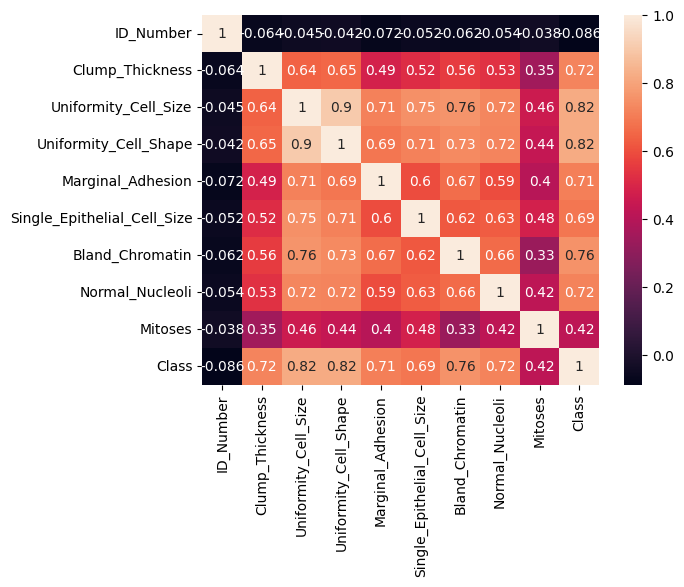

In [9]:
corr=df_data.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [17]:
df_data["Bare_Nuclei"]=df_data["Bare_Nuclei"].astype(np.int64)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID_Number                    629 non-null    int64
 1   Clump_Thickness              629 non-null    int64
 2   Uniformity_Cell_Size         629 non-null    int64
 3   Uniformity_Cell_Shape        629 non-null    int64
 4   Marginal_Adhesion            629 non-null    int64
 5   Single_Epithelial_Cell_Size  629 non-null    int64
 6   Bare_Nuclei                  629 non-null    int64
 7   Bland_Chromatin              629 non-null    int64
 8   Normal_Nucleoli              629 non-null    int64
 9   Mitoses                      629 non-null    int64
 10  Class                        629 non-null    int64
dtypes: int64(11)
memory usage: 59.0 KB


C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2886448510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Bare_Nuclei"]=df_data["Bare_Nuclei"].astype(np.int64)


# MODELOS

### KVECINOS:

In [59]:
# Sin bucle plantilla basica
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = df_data[['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin']]
y = df_data[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=33)

for p in range(1,30):
    model = KNeighborsClassifier(n_neighbors=p)
   
    model.fit(X_train, y_train)

    print('p = ',p)
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


p =  1
Error training: 0.0 %
Error test: 2.1164021164021163 %

p =  2
Error training: 2.500000000000002 %
Error test: 4.761904761904767 %

p =  3


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 1.8181818181818188 %
Error test: 2.645502645502651 %

p =  4


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 2.2727272727272707 %
Error test: 3.1746031746031744 %

p =  5
Error training: 1.5909090909090873 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  6
Error training: 2.2727272727272707 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  7
Error training: 1.8181818181818188 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  8
Error training: 2.0454545454545503 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 4.232804232804233 %

p =  9
Error training: 2.2727272727272707 %
Error test: 3.703703703703709 %



c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


p =  10
Error training: 2.500000000000002 %
Error test: 3.703703703703709 %

p =  11
Error training: 2.500000000000002 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  12
Error training: 2.7272727272727226 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  13
Error training: 2.500000000000002 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  14
Error training: 2.7272727272727226 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 3.1746031746031744 %

p =  15
Error training: 2.500000000000002 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 2.645502645502651 %

p =  16
Error training: 3.1818181818181857 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 2.645502645502651 %

p =  17
Error training: 3.409090909090906 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 2.645502645502651 %

p =  18
Error training: 3.1818181818181857 %


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error test: 2.645502645502651 %

p =  19


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  20


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.1818181818181857 %
Error test: 2.645502645502651 %

p =  21


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.1818181818181857 %
Error test: 2.645502645502651 %

p =  22


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  23


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  24


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  25


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  26


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  27


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  28


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %

p =  29


c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Error training: 3.409090909090906 %
Error test: 2.645502645502651 %



In [82]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

c:\Users\dome_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
def plot_confusion_matrix(X, y, model):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()


Training confusion matrix


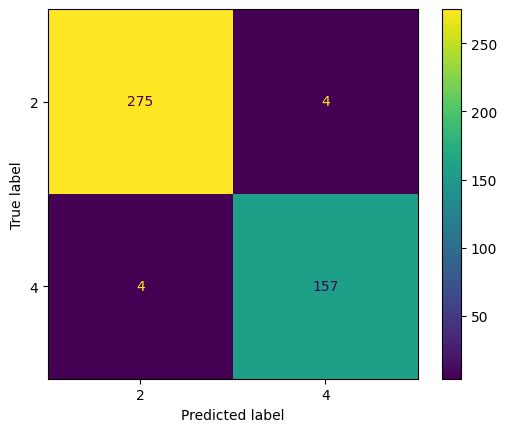

Test confusion matrix


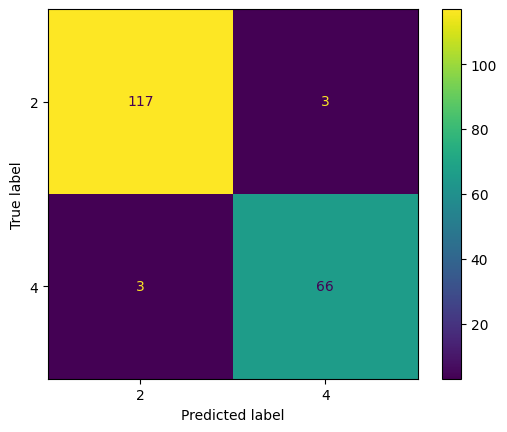

In [81]:
print("Training confusion matrix")
plot_confusion_matrix(X_train, y_train, model)
print("Test confusion matrix")
plot_confusion_matrix(X_test, y_test, model)

### ARBOL DE DECISIÓN:

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_data[['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin']]
y = df_data[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=33)

for p in range(1,30):
    model = DecisionTreeClassifier(criterion="gini", max_depth=p, random_state=33)

    model.fit(X_train, y_train)

    print('p = ',p)
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")

p =  1
Error training: 7.727272727272727 %
Error test: 5.820105820105825 %

p =  2
Error training: 5.909090909090908 %
Error test: 4.761904761904767 %

p =  3
Error training: 3.409090909090906 %
Error test: 4.761904761904767 %

p =  4
Error training: 1.1363636363636354 %
Error test: 4.761904761904767 %

p =  5
Error training: 1.1363636363636354 %
Error test: 4.232804232804233 %

p =  6
Error training: 0.4545454545454519 %
Error test: 5.291005291005291 %

p =  7
Error training: 0.2272727272727315 %
Error test: 5.291005291005291 %

p =  8
Error training: 0.2272727272727315 %
Error test: 6.349206349206349 %

p =  9
Error training: 0.0 %
Error test: 5.291005291005291 %

p =  10
Error training: 0.0 %
Error test: 5.291005291005291 %

p =  11
Error training: 0.0 %
Error test: 5.291005291005291 %

p =  12
Error training: 0.0 %
Error test: 5.291005291005291 %

p =  13
Error training: 0.0 %
Error test: 5.291005291005291 %

p =  14
Error training: 0.0 %
Error test: 5.291005291005291 %

p =  15
Er

In [94]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

Training confusion matrix


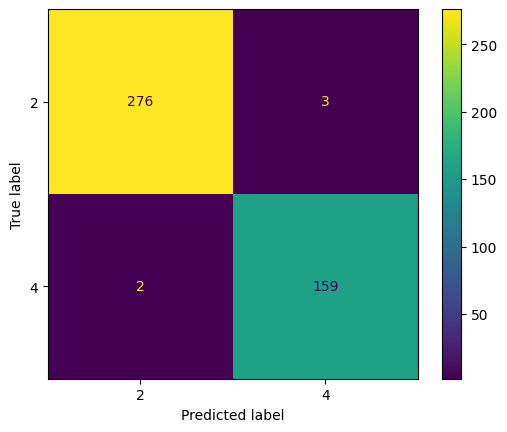

Test confusion matrix


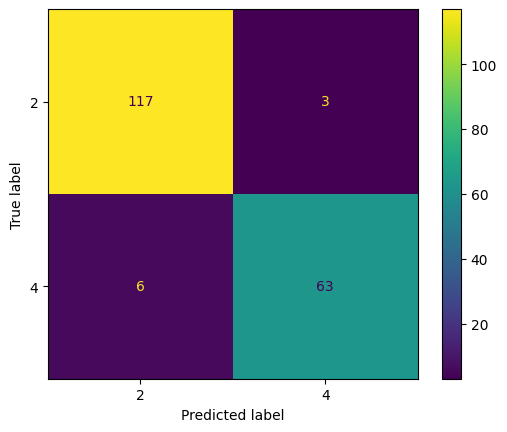

In [95]:
print("Training confusion matrix")
plot_confusion_matrix(X_train, y_train, model)
print("Test confusion matrix")
plot_confusion_matrix(X_test, y_test, model)

### RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_data[['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin']]
y = df_data[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=33)

for p in range(1,30):
    model = RandomForestClassifier(max_depth=p)

    model.fit(X_train, y_train)

    print('p = ',p)
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")

C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  1
Error training: 3.6363636363636376 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  2
Error training: 2.2727272727272707 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  3
Error training: 2.2727272727272707 %
Error test: 1.5873015873015928 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  4
Error training: 1.5909090909090873 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  5
Error training: 1.3636363636363669 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  6
Error training: 0.4545454545454519 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  7
Error training: 0.2272727272727315 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  8
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  9
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  10
Error training: 0.0 %
Error test: 3.1746031746031744 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  11
Error training: 0.0 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  12
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  13
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  14
Error training: 0.0 %
Error test: 3.1746031746031744 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  15
Error training: 0.0 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  16
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  17
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  18
Error training: 0.0 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  19
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  20
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  21
Error training: 0.0 %
Error test: 1.5873015873015928 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  22
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  23
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  24
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  25
Error training: 0.0 %
Error test: 3.1746031746031744 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  26
Error training: 0.0 %
Error test: 2.1164021164021163 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  27
Error training: 0.0 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  28
Error training: 0.0 %
Error test: 2.645502645502651 %



C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\2349248260.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


p =  29
Error training: 0.0 %
Error test: 2.645502645502651 %



In [98]:
model = RandomForestClassifier(max_depth=6)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

C:\Users\dome_\AppData\Local\Temp\ipykernel_18992\176785811.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training confusion matrix


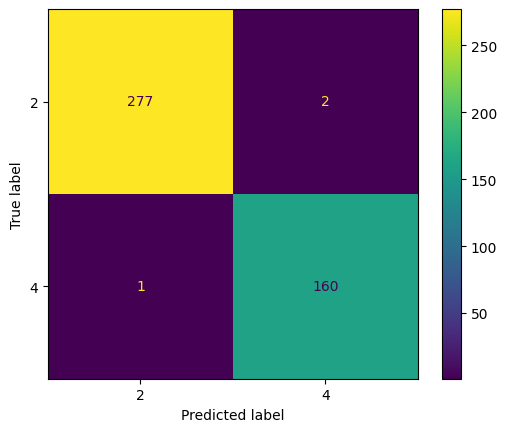

Test confusion matrix


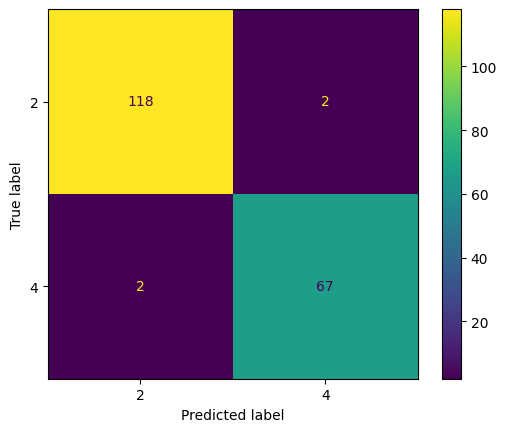

In [99]:
print("Training confusion matrix")
plot_confusion_matrix(X_train, y_train, model)
print("Test confusion matrix")
plot_confusion_matrix(X_test, y_test, model)

# **CONCLUSIÓN**

Se aplico 3 modelos distintos al data set, de los cuales se puede observar en la matriz de confusión que el modelo que nos proporciona menor cantidad de falsos negativos es el modelo Random Forest con profundidad 5 que en los datos de prueba nos arroja 2 falsos negativos.